In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from statistics import mean
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,LabelEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold,cross_val_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA
from kneed import KneeLocator

from imblearn.combine import SMOTETomek
import json








In [2]:
path= r"D:\Vaibhav_PC\Python\Datasets\aps_failure_training_set.csv"
df= pd.read_csv(path,na_values='na')
df.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0


In [3]:
df['class'].value_counts()  #its shpws data is unbalanced

class
neg    35188
pos     1000
Name: count, dtype: int64

In [4]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [5]:
#spilt numerical and categorical data
num_column= [feature for feature in df.columns if df[feature].dtype !='O']
cat_column= [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical feature {}'.format(len(num_column),num_column))
print('\n we have {} cat feature{}'.format(len(cat_column),cat_column))

We have 170 numerical feature ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', '

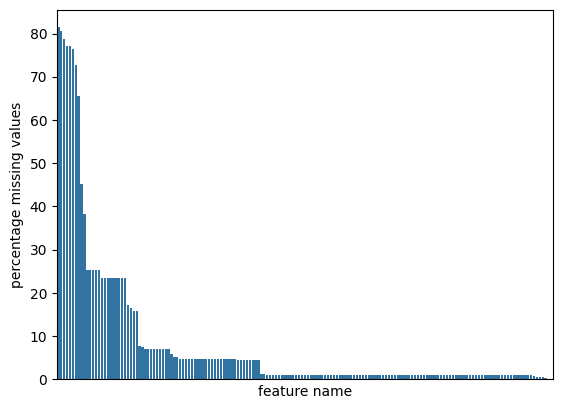

In [6]:
missing_values=df.isna().mean().to_frame().sort_values(by=0,ascending=False)*100
sns.barplot(x=missing_values.index,y=missing_values.values.ravel())
plt.ylabel("percentage missing values")
plt.xlabel("feature name")
plt.xticks([])
plt.show()

In [7]:
missing_values

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


In [8]:
#Drop more than 70% of missing values feature
drop_featuer=list(missing_values[missing_values[0]>70].index) # drop column list more than 70% of missing values feature

df.drop(columns=drop_featuer,axis=1,inplace=True) # drop column

In [9]:
df.shape # 7 feature are diropped


(36188, 164)

In [10]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

positive value 1000, Negative value 35188


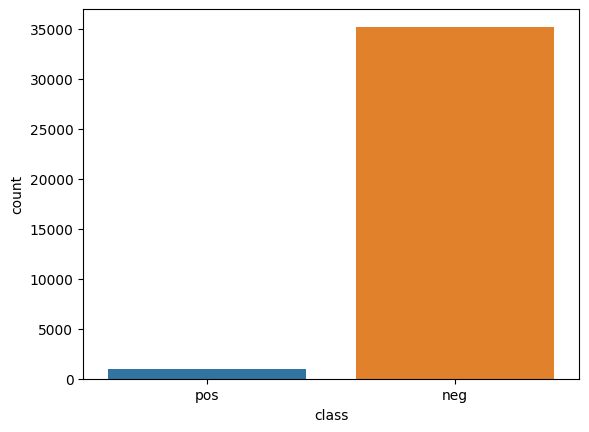

In [11]:

sns.countplot(df,x='class',hue='class')
print('positive value {}, Negative value {}'.format(df['class'].value_counts()[1],df['class'].value_counts()[0]))

In [12]:
#Poerecentage of missing values

total_missing_value=df.isna().sum().sum()/np.product(df.shape)*100

print(f'total_missing_value  {total_missing_value} %')

total_missing_value  5.37059852747306 %


Report

--> The target classes are highly imbalanced
--> Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative  class (majority class) very large compared to that of the positive class (minority class)
--> If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
Hence we should handle imbalanced data with certain methods.

How to handle Imbalance Data ?

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

Create Function for Model testing and evaluation

In [13]:
# model evaluation
def ml_eval(actual,pred):
    accuracy = accuracy_score(actual,pred)
    precision = precision_score(actual, pred)
    recall = recall_score(actual, pred)
    f1 = f1_score(actual, pred)
    roc= roc_auc_score(actual, pred)
    cm = confusion_matrix(actual, pred)

    return accuracy, precision, recall,f1,roc,cm

In [14]:
# creatign cost of the date

def cost_function(actual,pred):
    tn,fp,fn,tp= confusion_matrix(actual, pred).ravel()
    cost= 10*fp + 500*fn
    return cost



In [15]:
# model evaluation

def model_eval(x,y, models):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    
    cost=[]
    model_list=[]
    accuracy_list=[]
    
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(x_train,y_train)
        
        y_train_pred= model.predict(x_train)
        y_test_pred= model.predict(x_test)
        
        #model training set parameters
        ml_train_accuracy,ml_train_precision,ml_train_recall,\
        ml_train_f1,ml_train_roc,ml_train_cm= ml_eval(y_train,y_train_pred)
        train_cost= cost_function(y_train,y_train_pred)
        
        #model test set parameters
        ml_test_accuracy,ml_test_precision,ml_test_recall,\
        ml_test_f1,ml_test_roc,ml_test_cm= ml_eval(y_test,y_test_pred)
        test_cost= cost_function(y_test,y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print('Model performance for training data'.center(100,'*'))
       
        print(f'''--Accuracy: {ml_train_accuracy:0.4f}
                  -- Precision: {ml_train_precision:0.4f}
                  --Recall: {ml_train_recall:0.4f}
                  --F1 score: {ml_train_f1:0.4f}
                  --ROC AUC score: {ml_train_roc:0.4f}
                   --Ml Train_cm :{ml_train_cm}
                   --Cost: {train_cost}''')
        print('*'*100)
        
        print('Model performance for testing data'.center(100,'*'))
        print(f'''--Accuracy: {ml_test_accuracy:0.4f}
              --Precision: {ml_test_precision:0.4f}
              --Recall: {ml_test_recall:0.4f}
              --F1 score: {ml_test_f1:0.4f}
              --ROC AUC score: {ml_test_roc:0.4f}
              --Ml Test_cm :{ml_test_cm}
              --Cost: {test_cost}''')
        cost.append(test_cost)
        print('*'*100)
        
    report=pd.DataFrame(list(zip(model_list,cost)),columns=['model_name','Cost']).sort_values(by=['Cost'])
    return report
  

Plot Diastribution of all numerical features

In [16]:
# num_features= [feature for feature in df.columns if df[feature].dtype !='O']

# plt.figure(figsize=(15,100))

# for i,feature in enumerate(num_features):
#     plt.subplot(60,3,i+1)
#     sns.displot(df[feature],color='indianred')
#     plt.xlabel(feature,weight='bold')
#     plt.tight_layout()
#     plt.title(feature)

Evaluate model 

In [17]:
x= df.drop(['class'],axis=1)
y= df['class']


In [19]:
y.unique()
y=y.replace({'pos':1,'neg':0})


We will perform Rosbust scalling instead of Standard scaling sicne in this data most of features are not normally distributed.
Robust scalin will be done in IQR basis

In [21]:
robust_scaling= RobustScaler()
X1=robust_scaling.fit_transform(x)



We will try with KNN imupere techniue insted of using normal imoutation technique

In [22]:
result=[]
KnnImpute= KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')

neighbours_hyperparams =[1,3,5,7,9]

for n in neighbours_hyperparams:
    
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=n)),('m',LogisticRegression())])
    score = cross_val_score(pipeline,X1,y,scoring='accuracy',cv=2,n_jobs=-1)
    result.append(score)
    print('neighbour= %s || accuracy_score %0.2f',(n,score.mean()))
    

KeyboardInterrupt: 

In [27]:
num_feature=x.select_dtypes(exclude='O')
knn_pipeline= Pipeline(steps=([
    ('i', KNNImputer(n_neighbors=1)),
    ('scaler', RobustScaler())
]))

x_knn=knn_pipeline.fit_transform(x)

In [29]:
# perform smote operation to make resampling of minority class

smt= SMOTETomek(random_state=42,n_jobs=-1,sampling_strategy='minority')

x_res,y_res= smt.fit_resample(x_knn,y)


d:\Vaibhav_PC\Python\Project\SensorFault\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [23]:
#Model dictionary list

models= {
    'LogisticRegression':LogisticRegression(max_iter=10000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier(),
    'LGBMClassifier':LGBMClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
    }

In [97]:
#evaluate model

report=model_eval(x_res,y_res,models)

LogisticRegression
********************************Model performance for training data*********************************
--Accuracy: 0.6897
                  -- Precision: 0.6278
                  --Recall: 0.9289
                  --F1 score: 0.7492
                  --ROC AUC score: 0.6902
                   --Ml Train_cm :[[12692 15418]
 [ 1992 26010]]
                   --Cost: 1150180
****************************************************************************************************
*********************************Model performance for testing data*********************************
--Accuracy: 0.6916
              --Precision: 0.6314
              --Recall: 0.9319
              --F1 score: 0.7528
              --ROC AUC score: 0.6898
              --Ml Test_cm :[[3115 3845]
 [ 481 6587]]
              --Cost: 278950
****************************************************************************************************
DecisionTreeClassifier
********************************Model perfo

In [98]:
report

,model_name,Cost
2,RandomForestClassifier,0
4,XGBClassifier,0
5,CatBoostClassifier,11390
3,GradientBoostingClassifier,35870
7,AdaBoostClassifier,54000
6,LGBMClassifier,198730
1,DecisionTreeClassifier,278950
0,LogisticRegression,1150180


#Experiment :2 Using Simple Imputer using Median strategy

In [99]:
num_feature=x.select_dtypes(exclude='O')
median_pipeline= Pipeline(steps=([
    ('i', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
]))

x_Median=median_pipeline.fit_transform(x)

In [100]:
smt= SMOTETomek(random_state=42,n_jobs=-1,sampling_strategy='minority')

x_median_res,y_median_res= smt.fit_resample(x_Median,y)

d:\Vaibhav_PC\Python\Project\SensorFault\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [105]:
report_median= model_eval(x_median_res,y_median_res,models)

LogisticRegression
********************************Model performance for training data*********************************
--Accuracy: 0.6844
                  -- Precision: 0.6249
                  --Recall: 0.9187
                  --F1 score: 0.7439
                  --ROC AUC score: 0.6849
                   --Ml Train_cm :[[12674 15424]
 [ 2273 25701]]
                   --Cost: 1290740
****************************************************************************************************
*********************************Model performance for testing data*********************************
--Accuracy: 0.6875
              --Precision: 0.6303
              --Recall: 0.9202
              --F1 score: 0.7481
              --ROC AUC score: 0.6854
              --Ml Test_cm :[[3130 3817]
 [ 564 6507]]
              --Cost: 320170
****************************************************************************************************
DecisionTreeClassifier
********************************Model perfo

In [106]:
report_median

,model_name,Cost
4,XGBClassifier,6100
5,CatBoostClassifier,6790
6,LGBMClassifier,8750
2,RandomForestClassifier,12490
1,DecisionTreeClassifier,28390
3,GradientBoostingClassifier,48240
7,AdaBoostClassifier,87120
0,LogisticRegression,320170


Experiment 03:- Fillling NAN values by const imputation technique

In [29]:
num_feature=x.select_dtypes(exclude='O')
constant_pipeline= Pipeline(steps=([
    ('i', SimpleImputer(strategy='constant')),
    ('scaler', RobustScaler())
]))

x_constant=constant_pipeline.fit_transform(x)

In [30]:
smt= SMOTETomek(random_state=42,n_jobs=-1,sampling_strategy='minority')

x_const_res,y_const_res= smt.fit_resample(x_constant,y)

d:\Vaibhav_PC\Python\Project\SensorFault\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [31]:
report_constant= model_eval(x_const_res,y_const_res,models)

LogisticRegression
********************************Model performance for training data*********************************
--Accuracy: 0.6935
                  -- Precision: 0.6233
                  --Recall: 0.9766
                  --F1 score: 0.7610
                  --ROC AUC score: 0.6937
                   --Ml Train_cm :[[11529 16543]
 [  655 27377]]
                   --Cost: 492930
****************************************************************************************************
*********************************Model performance for testing data*********************************
--Accuracy: 0.6931
              --Precision: 0.6233
              --Recall: 0.9804
              --F1 score: 0.7621
              --ROC AUC score: 0.6922
              --Ml Test_cm :[[2826 4167]
 [ 138 6895]]
              --Cost: 110670
****************************************************************************************************
DecisionTreeClassifier
********************************Model perfor

In [32]:
report_constant

,model_name,Cost
4,XGBClassifier,2980
5,CatBoostClassifier,3950
6,LGBMClassifier,4550
2,RandomForestClassifier,10730
1,DecisionTreeClassifier,22810
3,GradientBoostingClassifier,57100
7,AdaBoostClassifier,98790
0,LogisticRegression,110670


#Experment 04: using PCA 

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables!
As the dataset has 164 columns we can try PCA and check our metrics Cost

In [33]:
pca_pipeline= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant')),
    ('scalar',RobustScaler())
])

x_pca=pca_pipeline.fit_transform(x)

In [34]:
var_ratio={}

for i in range(2,150):
    pc= PCA(n_components=i)
    df_pca= pc.fit(x_pca)
    var_ratio[i]=sum(df_pca.explained_variance_ratio_)

<Axes: >

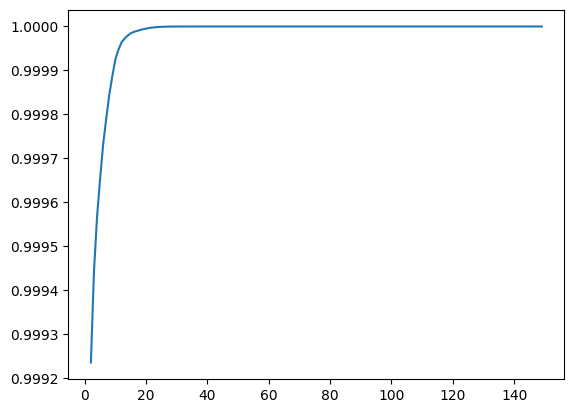

In [37]:
#ploting variance ratio
pd.Series(var_ratio).plot()

<Figure size 500x500 with 0 Axes>

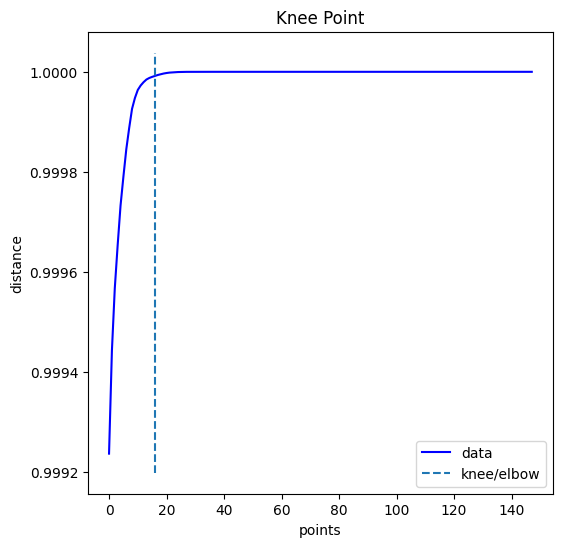

k-locator 18


In [45]:


i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig=plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel('points')
plt.ylabel('distance')
plt.show()
print('k-locator',components[knee.knee])

In [47]:
pca_final = PCA(n_components=18,random_state=42)

x_pca_final = pca_final.fit_transform(x_pca)

smt=SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
x_pca,y_pca=smt.fit_resample(x_pca_final,y)


d:\Vaibhav_PC\Python\Project\SensorFault\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [49]:
report_pca= model_eval(x_pca,y_pca,models)

LogisticRegression
********************************Model performance for training data*********************************
--Accuracy: 0.8749
                  -- Precision: 0.9503
                  --Recall: 0.7913
                  --F1 score: 0.8635
                  --ROC AUC score: 0.8749
                   --Ml Train_cm :[[26797  1157]
 [ 5839 22133]]
                   --Cost: 2931070
****************************************************************************************************
*********************************Model performance for testing data*********************************
--Accuracy: 0.8748
              --Precision: 0.9486
              --Recall: 0.7923
              --F1 score: 0.8634
              --ROC AUC score: 0.8747
              --Ml Test_cm :[[6700  300]
 [1450 5532]]
              --Cost: 728000
****************************************************************************************************
DecisionTreeClassifier
********************************Model perfo

In [51]:
report_pca

,model_name,Cost
2,RandomForestClassifier,42020
4,XGBClassifier,59890
5,CatBoostClassifier,72660
1,DecisionTreeClassifier,83810
6,LGBMClassifier,92320
3,GradientBoostingClassifier,221200
7,AdaBoostClassifier,318550
0,LogisticRegression,728000


In [54]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","KNN Imputer","8260"])
pt.add_row(["XGBClassifier","KNN Imputer-Median","6100"])
pt.add_row(["XGBClassifier","Simple Imputer-constant","2980"])
pt.add_row(["RandomForestClassifier","PCA","42020"])
print(pt)

+------------------------+-------------------------+------------+
|         Model          |    Imputation_method    | Total_cost |
+------------------------+-------------------------+------------+
|     XGBClassifier      |       KNN Imputer       |    8260    |
|     XGBClassifier      |    KNN Imputer-Median   |    6100    |
|     XGBClassifier      | Simple Imputer-constant |    2980    |
| RandomForestClassifier |           PCA           |   42020    |
+------------------------+-------------------------+------------+


From the final report we can see than XGBClassifier with Simple imputer with strategy constant has performed the best with cost of 2980

In [56]:
final_model = XGBClassifier()

smt= SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
x_res,y_res=smt._fit_resample(x_constant,y)


d:\Vaibhav_PC\Python\Project\SensorFault\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [61]:
model= final_model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)


In [67]:
print('Final XGBoostCalssifier accuracy score for training data',accuracy_score(y_train,y_pred_train))
print('Final XGBoostCalssifier accuracy score for testing data',accuracy_score(y_test,y_pred_test))



Final XGBoostCalssifier accuracy score for training data 0.9999821759589335
Final XGBoostCalssifier accuracy score for testing data 0.9962213032938828


In [68]:
cost_function(y_test,y_pred_test)

2980

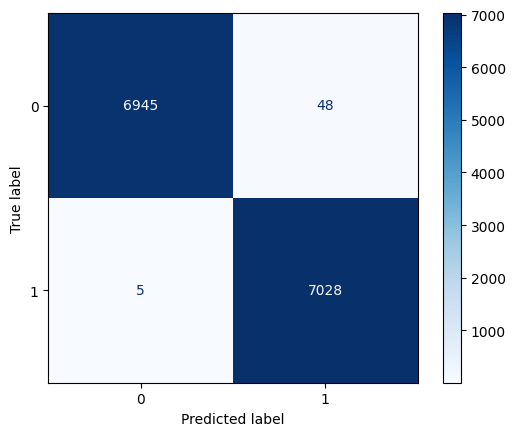

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(final_model,x_test,y_test,cmap='Blues')
plt.show()

In [3]:
np.array([2,3,4,6]).reshape(-1,1).shape

NameError: name 'np' is not defined

In [6]:
np.array([[2],[3],[4]]).shape

(3, 1)